# Day 2 Homework: Exercises and Advanced Exercises

## Question 1 & 2

Load the data into a pandas data frame. Calculate the "alternate allele frequency for each SNP.

In [1]:
#importing necessary items for the homework

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
#opening our file and making it a pandas file

matrix = pd.read_csv('/Users/cmdb/Downloads/matrix_1kg.txt',
                    sep = '\t')
matrix

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#sum the number for alt frequencies and divide by total number of chromosomes(2 chr per ind)
#sum of row/(individuals*2)

#gives us the number of rows and columns at the end
matrix.sum  

<bound method DataFrame.sum of       CHROM       POS REF ALT  HG00096  HG00097  HG00099  HG00100  HG00101  \
0     chr21  14347281   C   T        0        0        0        0        0   
1     chr21  14003813   T   C        0        0        1        0        0   
2     chr21  39261634   T   A        0        0        0        0        0   
3     chr21  17793478   A   G        0        0        0        0        0   
4     chr21  35934376   C   T        0        0        0        0        0   
...     ...       ...  ..  ..      ...      ...      ...      ...      ...   
9995  chr21  28142462   A   C        0        0        0        0        0   
9996  chr21  17061272   C   T        0        0        0        0        0   
9997  chr21  43768467   C   A        0        0        0        0        0   
9998  chr21  36334991   G   T        0        0        0        0        0   
9999  chr21  36058147   T   G        0        0        0        0        0   

      HG00102  ...  NA21128  NA2

In [4]:
matrix.iloc[:, 4:].sum(axis=1)
#first argument says all the rows, second argument tells which column to start at

0         2
1        98
2        17
3        11
4         2
       ... 
9995    105
9996      1
9997      7
9998    147
9999     13
Length: 10000, dtype: int64

In [5]:
#gives the different values for the column chrom
matrix['CHROM'].value_counts()

chr21    10000
Name: CHROM, dtype: int64

In [23]:
matrix.iloc[:, 4:].sum(axis=1)
#first argument says all the rows, second argument tells which column to start at


#creating variables for our division
sum_allele_freq = matrix.iloc[:, 4:].sum(axis=1)
hg_snp = matrix.iloc[:, 4:]  #tells the number of individuals but starting the coulmn where the ind start

allele_freq = sum_allele_freq/(2*hg_snp.shape[1])
allele_freq

0       0.000392
1       0.019231
2       0.003336
3       0.002159
4       0.000392
          ...   
9995    0.020604
9996    0.000196
9997    0.001374
9998    0.028846
9999    0.002551
Length: 10000, dtype: float64

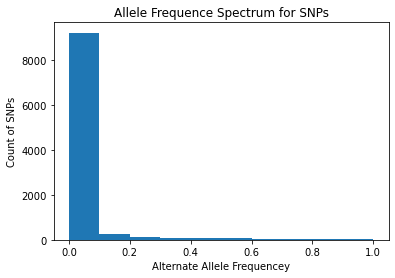

In [22]:
#Plotting the Allele Frequency Spectrum

fig, ax = plt.subplots()
ax.hist(allele_freq)
ax.set_title('Allele Frequence Spectrum for SNPs')
ax.set_xlabel('Alternate Allele Frequencey')
ax.set_ylabel('Count of SNPs',)
plt.show()

## Question 3

Subset the data frame to "common variation", where the alternate allele frequency is between 0.05 and 0.95.

In [10]:
#defining the row of interest to fall under common variation

roi = (allele_freq > 0.05) & (allele_freq < 0.95)
roi

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [11]:
#only displays the rows that fall under our contidion
matrix_com_var = matrix.loc[roi,]
matrix_com_var

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
20,chr21,26683267,T,G,0,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
32,chr21,37584553,T,C,1,2,1,1,1,1,...,1,1,2,0,0,0,1,1,1,0
38,chr21,34522570,A,T,0,1,2,1,1,1,...,0,1,0,1,1,1,1,2,0,1
41,chr21,41704121,A,G,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,chr21,29502200,G,T,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,chr21,40748951,T,C,1,2,2,2,2,2,...,2,2,2,2,2,2,2,2,1,2
9959,chr21,42683839,C,T,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9974,chr21,38472865,C,G,0,1,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
9975,chr21,43359202,C,T,2,1,0,1,0,1,...,1,2,2,2,2,1,2,2,2,2


## Question 4

Perform principal components analysis to cluster the samples based on their SNP genotypes. Plot your samples on the first and second principal components.

In [12]:
pca_input = matrix.iloc[:, 4:]
pca_input = pca_input.T

#not sure if we need to standardize
pca = PCA(n_components = 2)
pca_input_standard = StandardScaler().fit_transform(pca_input)
pca_output = pca.fit_transform(pca_input_standard)

pca_output_df = pd.DataFrame(data = pca_output, columns = ['PC1', 'PC2'])
pca_output_df

,PC1,PC2
0,-8.339430,-10.428781
1,-8.461238,-10.323256
2,-8.294200,-9.023800
3,-7.921072,-9.075238
4,-8.883854,-10.099735
...,...,...
2543,-8.045113,-0.478170
2544,-8.438440,-3.946090
2545,-6.332749,-3.780771
2546,-8.614921,-2.743626


Text(0, 0.5, 'PC2')

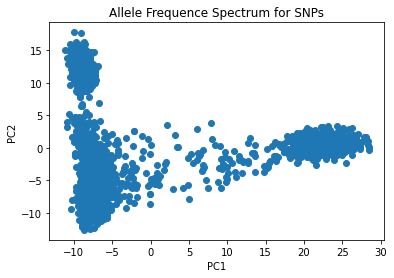

In [24]:
fig, ax = plt.subplots()
ax.scatter(x = pca_output_df['PC1'], y = pca_output_df['PC2'])
ax.set_title('Spectrum for SNPs')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2',)
#what is the title for this one

# Advance Exercises

## Question 5 & 6

By intersecting these metadata with your principal component scores, color the PCA plot according to population, superpopulation, and sex (3 separate plots).

In [14]:
df_meta = pd.read_csv('/Users/cmdb/qbb2020-answers/day2-homework/integrated_call_samples_v3.20130502.ALL.panel', 
                     sep = '\t')
df_meta = df_meta.iloc[:, :-2]
df_meta

,sample,pop,super_pop,gender
0,HG00096,GBR,EUR,male
1,HG00097,GBR,EUR,female
2,HG00099,GBR,EUR,female
3,HG00100,GBR,EUR,female
4,HG00101,GBR,EUR,male
...,...,...,...,...
2499,NA21137,GIH,SAS,female
2500,NA21141,GIH,SAS,female
2501,NA21142,GIH,SAS,female
2502,NA21143,GIH,SAS,female


In [15]:
pca_output_df['sample'] = pca_input.index
pca_output_df

,PC1,PC2,sample
0,-8.339430,-10.428781,HG00096
1,-8.461238,-10.323256,HG00097
2,-8.294200,-9.023800,HG00099
3,-7.921072,-9.075238,HG00100
4,-8.883854,-10.099735,HG00101
...,...,...,...
2543,-8.045113,-0.478170,NA21137
2544,-8.438440,-3.946090,NA21141
2545,-6.332749,-3.780771,NA21142
2546,-8.614921,-2.743626,NA21143


In [16]:
pca_output_df = pd.merge(pca_output_df, df_meta, on = 'sample')
pca_output_df

,PC1,PC2,sample,pop,super_pop,gender
0,-8.339430,-10.428781,HG00096,GBR,EUR,male
1,-8.461238,-10.323256,HG00097,GBR,EUR,female
2,-8.294200,-9.023800,HG00099,GBR,EUR,female
3,-7.921072,-9.075238,HG00100,GBR,EUR,female
4,-8.883854,-10.099735,HG00101,GBR,EUR,male
...,...,...,...,...,...,...
2498,-8.045113,-0.478170,NA21137,GIH,SAS,female
2499,-8.438440,-3.946090,NA21141,GIH,SAS,female
2500,-6.332749,-3.780771,NA21142,GIH,SAS,female
2501,-8.614921,-2.743626,NA21143,GIH,SAS,female


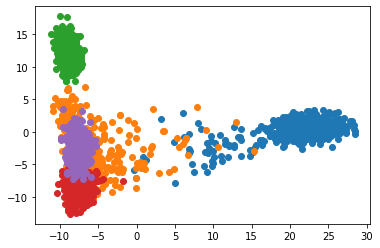

In [17]:
fig, ax = plt.subplots()
groups = pca_output_df.groupby("super_pop")
for name, group in groups:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name)

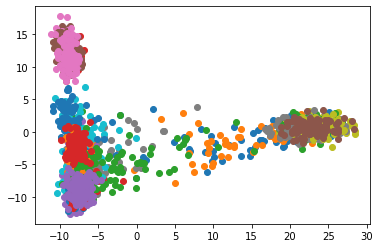

In [18]:
fig, ax = plt.subplots()
groups = pca_output_df.groupby("pop")
for name, group in groups:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name)
    

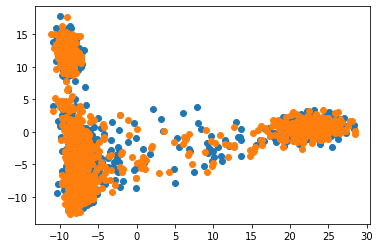

In [19]:
fig, ax = plt.subplots()
groups = pca_output_df.groupby("gender")
for name, group in groups:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name)

# Exercise 7

In [ ]:
#import the 3D format
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatteeer(pca_outputdf['PC1'], pca_output_df['PC2'], pca)